In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("tesla_deliveries_dataset_2015_2025.csv")



In [3]:
yearly = df.groupby("Year")[["Estimated_Deliveries", "Production_Units", "Avg_Price_USD"]].mean()



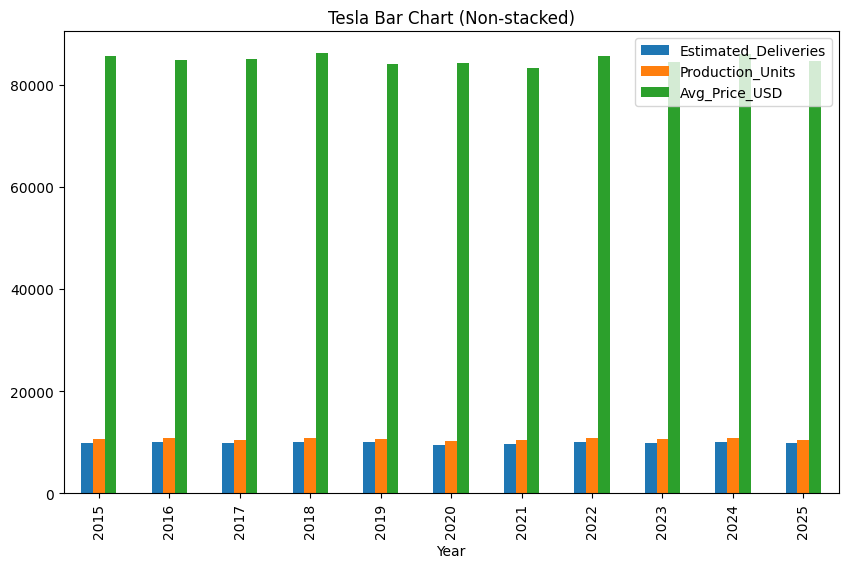

In [4]:
yearly.plot(kind="bar", figsize=(10,6), title="Tesla Bar Chart (Non-stacked)")
plt.show()


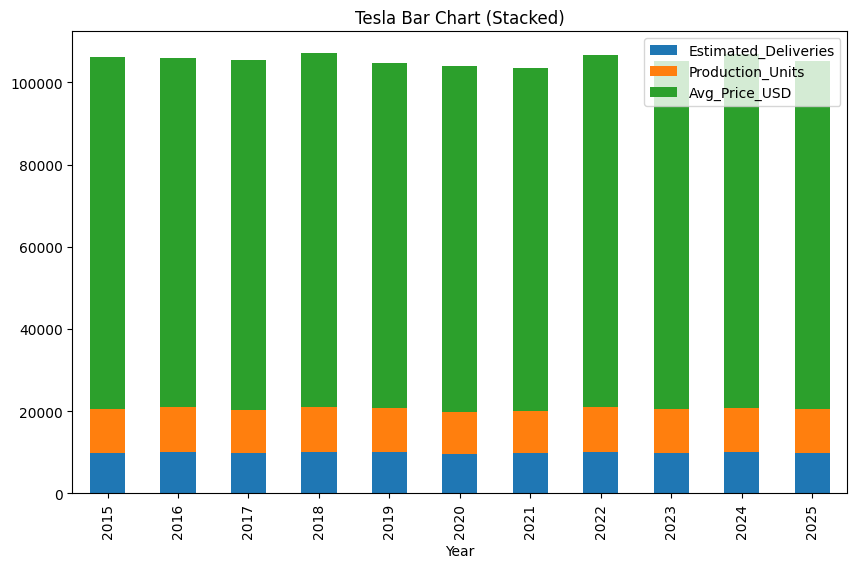

In [5]:
yearly.plot(kind="bar", stacked=True, figsize=(10,6), title="Tesla Bar Chart (Stacked)")
plt.show()


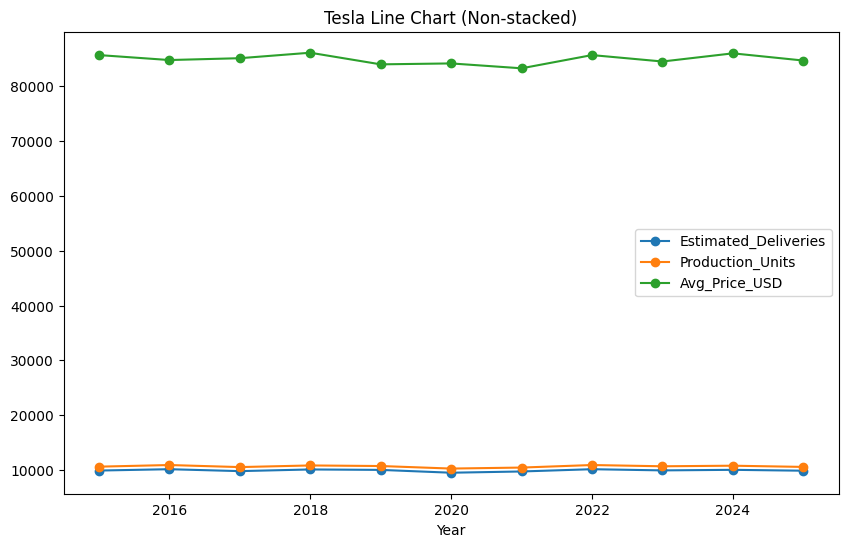

In [6]:
yearly.plot(kind="line", marker='o', figsize=(10,6), title="Tesla Line Chart (Non-stacked)")
plt.show()


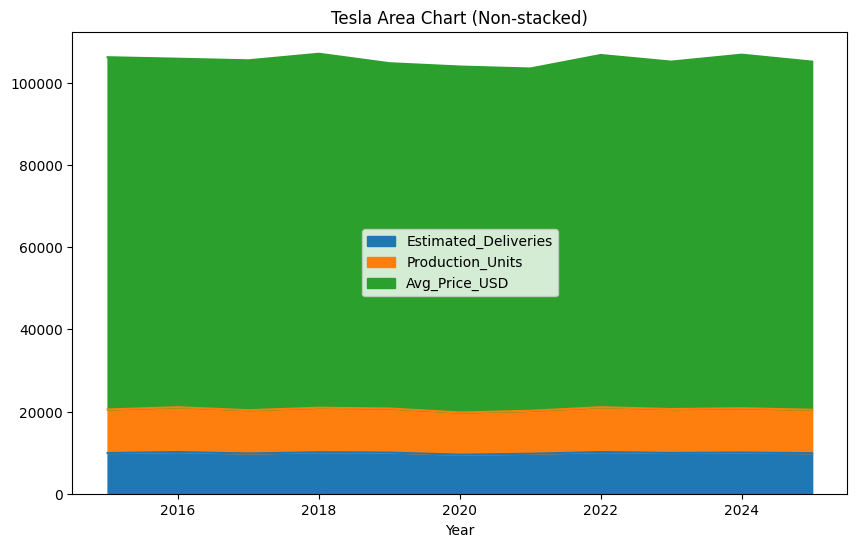

In [7]:
yearly.plot(kind="area", figsize=(10,6), title="Tesla Area Chart (Non-stacked)")
plt.show()


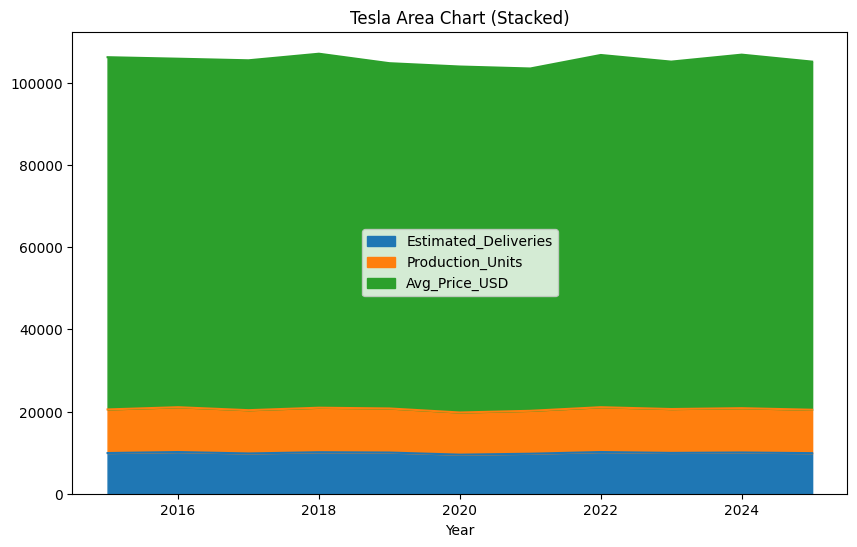

In [8]:
yearly.plot(kind="area", stacked=True, figsize=(10,6), title="Tesla Area Chart (Stacked)")
plt.show()


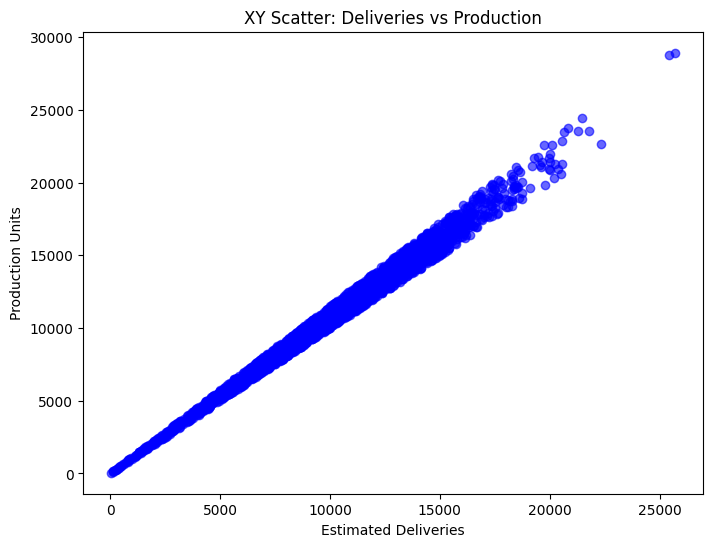

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(df["Estimated_Deliveries"], df["Production_Units"], c='blue', alpha=0.6)
plt.title("XY Scatter: Deliveries vs Production")
plt.xlabel("Estimated Deliveries")
plt.ylabel("Production Units")
plt.show()


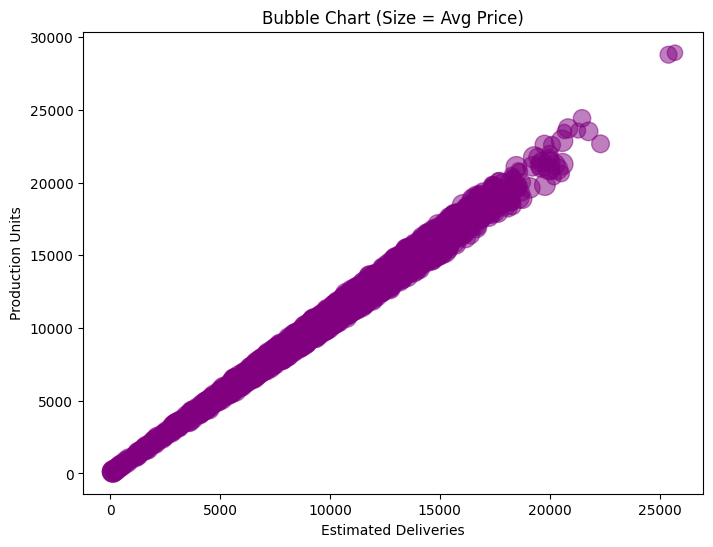

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(df["Estimated_Deliveries"], df["Production_Units"], 
            s=df["Avg_Price_USD"]/500, alpha=0.5, color='purple')
plt.title("Bubble Chart (Size = Avg Price)")
plt.xlabel("Estimated Deliveries")
plt.ylabel("Production Units")
plt.show()

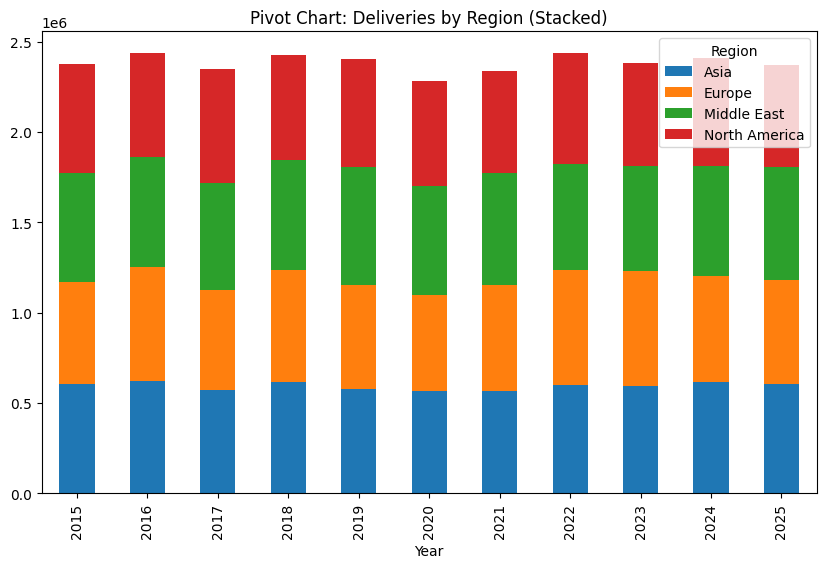

In [11]:
pivot = pd.pivot_table(df, values='Estimated_Deliveries', index='Year', columns='Region', aggfunc='sum', fill_value=0)
pivot.plot(kind='bar', stacked=True, figsize=(10,6), title="Pivot Chart: Deliveries by Region (Stacked)")
plt.show()


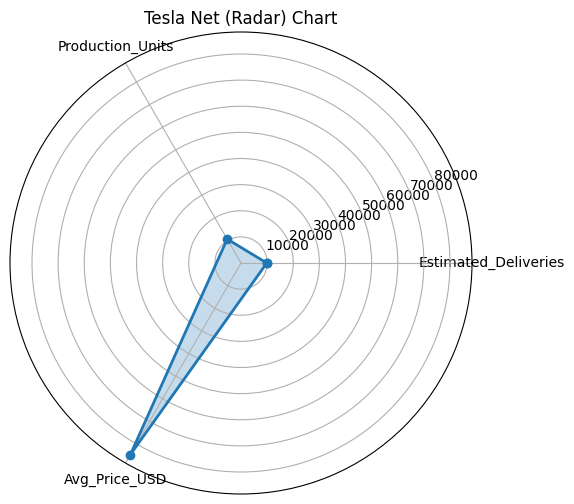

In [13]:
categories = list(yearly.columns)
values = yearly.iloc[-1].tolist()
values += values[:1]
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))
ax.plot(angles, values, 'o-', linewidth=2)
ax.fill(angles, values, alpha=0.25)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
plt.title("Tesla Net (Radar) Chart")
plt.show()


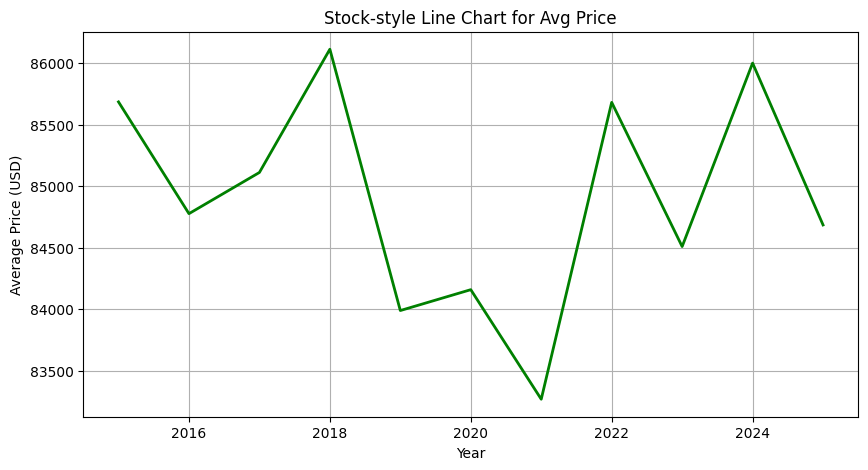

In [14]:
plt.figure(figsize=(10,5))
plt.plot(yearly.index, yearly["Avg_Price_USD"], color='green', linewidth=2)
plt.title("Stock-style Line Chart for Avg Price")
plt.xlabel("Year")
plt.ylabel("Average Price (USD)")
plt.grid(True)
plt.show()


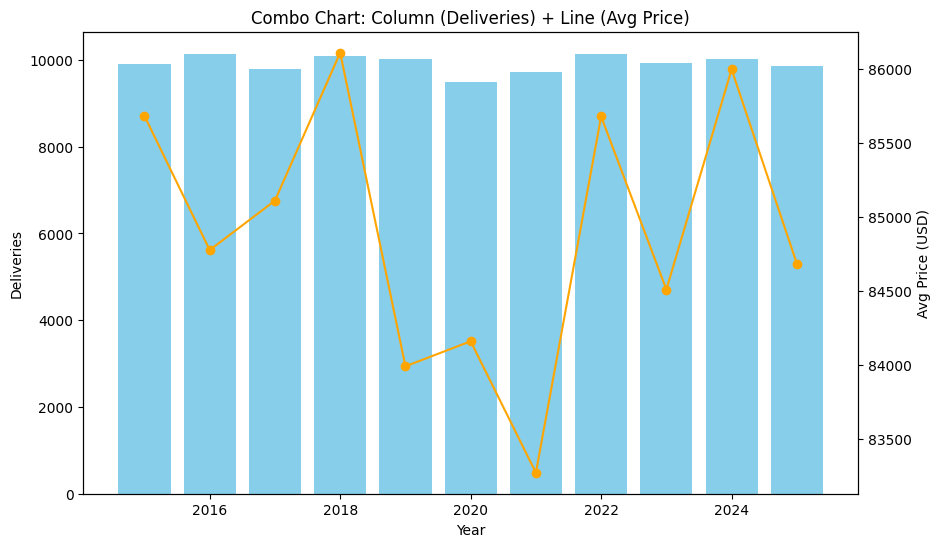

In [15]:
fig, ax1 = plt.subplots(figsize=(10,6))
ax1.bar(yearly.index, yearly["Estimated_Deliveries"], color='skyblue', label='Deliveries')
ax2 = ax1.twinx()
ax2.plot(yearly.index, yearly["Avg_Price_USD"], color='orange', marker='o', label='Avg Price')
ax1.set_xlabel("Year")
ax1.set_ylabel("Deliveries")
ax2.set_ylabel("Avg Price (USD)")
plt.title("Combo Chart: Column (Deliveries) + Line (Avg Price)")
plt.show()


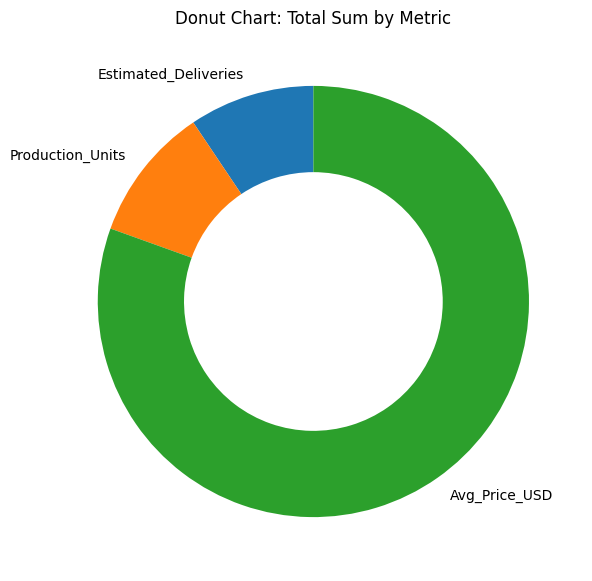

In [16]:
total = yearly.sum()
plt.figure(figsize=(7,7))
plt.pie(total, labels=total.index, startangle=90, wedgeprops={'width':0.4})
plt.title("Donut Chart: Total Sum by Metric")
plt.show()